### A. Constructing a perfect model

* Data

In [2]:
# input temps 
# customers
# parameters

In [1]:
import numpy as np

In [13]:
temps = np.random.randint(0, 100, 50).reshape(-1, 1)
biases = np.ones(50).reshape(-1, 1)
features = np.hstack((temps, biases))

In [26]:
# features

In [15]:
params = np.array([4, 40])

In [18]:
y = features @ params

In [21]:
from graph import trace_values, plot

In [22]:
temps.reshape(50)

array([80, 58, 51, 59, 84, 60, 78, 27, 84, 63, 78,  4, 19, 17, 51, 43, 88,
       87, 56, 38, 36, 23, 89, 66, 12, 90, 69, 79, 33, 94, 49, 89, 11, 55,
        4, 89, 11, 20,  4,  4, 69, 42, 58, 76, 31, 95, 83, 47, 14, 79])

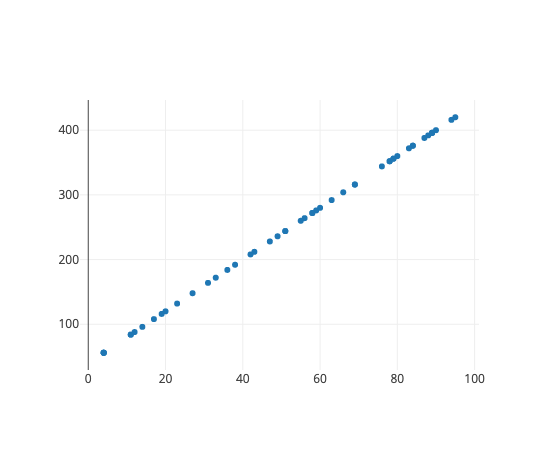

In [23]:
data_trace = trace_values(temps.reshape(50), y)
plot([data_trace])

* Fitting the data

In [24]:
from sklearn.linear_model import LinearRegression

In [27]:
model = LinearRegression(fit_intercept=False)

In [28]:
model.fit(features, y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [29]:
model.coef_

array([ 4., 40.])

### B. Irreducible error

In [40]:
predictions= model.predict(features)

In [34]:
errors = np.random.randint(-50,50, 50)

In [35]:
errors = np.random.randint(-50,50, 50)
noisy_customers = y + errors

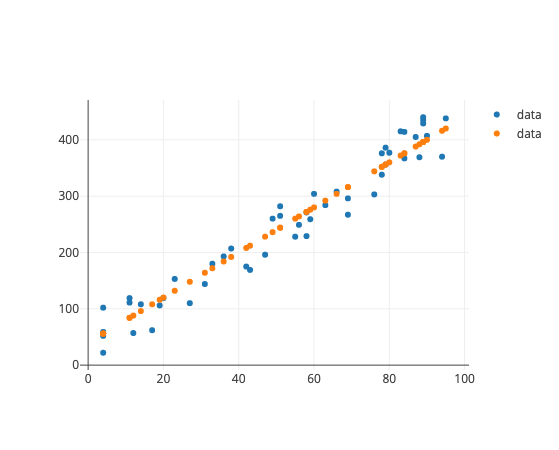

In [41]:
predictions_trace = trace_values(temps.reshape(50), predictions)
noisy_data_trace = trace_values(temps.reshape(50), noisy_customers)
plot([noisy_data_trace, predictions_trace])

### Variance

In [47]:
model_with_variance = LinearRegression(fit_intercept=False)

In [48]:
model_with_variance.fit(features, noisy_customers)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [49]:
model_with_variance.coef_

array([ 4.1228242 , 33.24014338])

In [52]:
models = []
for num in range(0, 500):
    errors = np.random.randint(-50,50, 50)
    noisy_customers = y + errors
    model = LinearRegression(fit_intercept = False)
    model.fit(features, noisy_customers)
    models.append(model)

In [65]:
coefs = np.array([model.coef_ for model in models])

In [70]:
np.var(coefs[:,1])

75.6667637043396